### Components del grup:

Gerard Asbert, 1603295

Albert Ceballos, 1604259

Josep Ulldemolins, 1604197

Daniel Garcia, 1600877

In [48]:
import cv2
import metrikz
import utility
import pylab
import matplotlib.pyplot as plt
import os

### Exercici 1


Assumim 24 bpp i 30 fps.

Nombre total de píxels per frame: 3840 píxels × 2160 píxels = 8,294,400 píxels

Bytes per frame: 8,294,400 píxels × 24/8 bytes/píxel = 24,883,200 bytes

Bytes totals del video: 24,883,200 x 30 frames/segon x 60 segons/minut x 120 minuts = 5,374,771,200,000 bytes

GigaBytes totals del video: 5,374,771,200,000 bytes / 1,024,000,000 bytes/Gigabyte = 5,248.8 Gigabytes



### Exercici 2.1

El q-scale és un paràmetre que controla la qualitat de la imatge resultant, i per tant, també afecta a la mida del video. El rang utilitzat es de 0 a 51.

### Exercici 2.2 i 2.3

In [49]:
def runVideo(nombre_input, qscale, nombre_output):
	# Noms dels arxius d'entrada i sortida. Excemples
	video_input_file = nombre_input
	video_output_file = nombre_output
	frames_input_file = './frames/' + nombre_input
	input_sin_ext = nombre_input.rsplit('.', 1)[0]

	# Comanda per a la compresio a MPEG1
	command = [
	    'ffmpeg',
	    '-y',
	    '-an',
	    '-i', frames_input_file,
	    '-qscale', str(qscale),
	    '-vcodec', 'mpeg1video',
	    video_output_file,
	]

	# Executem la comanda
	utility.execute_command(command)

	# Comanda per a extraure els quadres (frames) del video original
	command = [
	     'ffmpeg',
	     '-y',
	     '-i', frames_input_file,
		 './frames/original%d.png'
		 # './frames/' + input_sin_ext + '/'+ str(qscale) +'/imagenes/original%d.png'
	 ]

	utility.execute_command(command)

	# Comanda per a extreure els quadres del video codificat
	command = [
	     'ffmpeg',
	     '-y',
	     '-i', video_output_file,
		 './frames/encoded%d.png'
	 ]

	utility.execute_command(command)

	# Exemple per lleguir 1 imagatge i comparala amb la codificada, i calcular la metrica de SSIM entre les dues
	#source = cv2.imread('./frames/' + input_sin_ext + '/'+ str(qscale) +'/imagenes/original' + str(2) + '.png')
	#target = cv2.imread('./frames/' + input_sin_ext + '/' + str(qscale) + '/imagenes/encoded' + str(2) + '.png')
	source = cv2.imread('./frames/original' + str(2) + '.png')
	target = cv2.imread('./frames/encoded' + str(2) + '.png')
	

	return metrikz.mse(source, target), metrikz.ssim(source, target), metrikz.snr(source, target)

In [50]:
mses = {}
ssims = {}
snrs = {}
sizes = {}
for name in ['akiyo', 'flower', 'foreman', 'galleon_422']:
    size = os.stat('./frames/' + name + '_cif.y4m').st_size
    for i in range(10,51,10):

        mses[i], ssims[i], snrs[i] = runVideo(name +'_cif.y4m', i, './frames/' + name + '_mpeg.mpeg')
        sizes[i] = os.stat('./frames/' + name + '_mpeg.mpeg').st_size


    print(name)
    print('Size original ' + str(size))
    print('Sizes comprimidos: ')
    print(sizes)
    print('Mses comprimidos: ')
    print(mses)
    print('Ssims comprimidos: ')
    print(ssims)
    print('Snrs comprimidos: ')
    print(snrs)

akiyo
Size original 45621044
Sizes comprimidos: 
{10: 299008, 20: 180224, 30: 145408, 40: 141312, 50: 141312}
Mses comprimidos: 
{10: 23.62488162878788, 20: 49.438095144149834, 30: 75.55368792087542, 40: 78.2986341277357, 50: 78.6200284090909}
Ssims comprimidos: 
{10: 0.9510690086196484, 20: 0.9220911424193654, 30: 0.9001701050125295, 40: 0.897232766453981, 50: 0.8967553170471089}
Snrs comprimidos: 
{10: 27.456997863887235, 20: 24.250076985824492, 30: 22.408137596243897, 40: 22.253152414463457, 50: 22.235362311510933}
flower
Size original 38017544
Sizes comprimidos: 
{10: 2226176, 20: 1034240, 30: 616448, 40: 591872, 50: 593920}
Mses comprimidos: 
{10: 80.86366595643939, 20: 214.16360874368686, 30: 351.73225747053874, 40: 366.3581551188973, 50: 367.2125355113636}
Ssims comprimidos: 
{10: 0.9677490054219235, 20: 0.927332350680492, 30: 0.8922803344099269, 40: 0.8881719542809978, 50: 0.8882112530651078}
Snrs comprimidos: 
{10: 27.564615883556982, 20: 23.334693382727774, 30: 21.18002815131

### Exercici 3.1

In [51]:
def runVideoEveryFrame(nombre_input, qscale, nombre_output):
	# Noms dels arxius d'entrada i sortida. Excemples
	video_input_file = nombre_input
	video_output_file = nombre_output
	frames_input_file = './frames/' + nombre_input
	input_sin_ext = nombre_input.rsplit('.', 1)[0]

	# Comanda per a la compresio a MPEG1
	command = [
	    'ffmpeg',
	    '-y',
	    '-an',
	    '-i', frames_input_file,
	    '-qscale', str(qscale),
	    '-vcodec', 'mpeg1video',
	    video_output_file,
	]

	# Executem la comanda
	utility.execute_command(command)

	# Comanda per a extraure els quadres (frames) del video original
	command = [
	     'ffmpeg',
	     '-y',
	     '-i', frames_input_file,
		 './frames/original%d.png'
		 # './frames/' + input_sin_ext + '/'+ str(qscale) +'/imagenes/original%d.png'
	 ]

	utility.execute_command(command)

	# Comanda per a extreure els quadres del video codificat
	command = [
	     'ffmpeg',
	     '-y',
	     '-i', video_output_file,
		 './frames/encoded%d.png'
	 ]

	utility.execute_command(command)

	# Exemple per lleguir 1 imagatge i comparala amb la codificada, i calcular la metrica de SSIM entre les dues
	#source = cv2.imread('./frames/' + input_sin_ext + '/'+ str(qscale) +'/imagenes/original' + str(2) + '.png')
	#target = cv2.imread('./frames/' + input_sin_ext + '/' + str(qscale) + '/imagenes/encoded' + str(2) + '.png')
	source = cv2.imread('./frames/original' + str(2) + '.png')
	target = cv2.imread('./frames/encoded' + str(2) + '.png')
	mses  = []
	ssims = []
	snrs = []
	for i in range(len(source)):
		mses.append(metrikz.mse(source[i], target[i]))
		ssims.append(metrikz.ssim(source[i], target[i]))
		snrs.append(metrikz.snr(source[i], target[i]))
	return mses, ssims, snrs

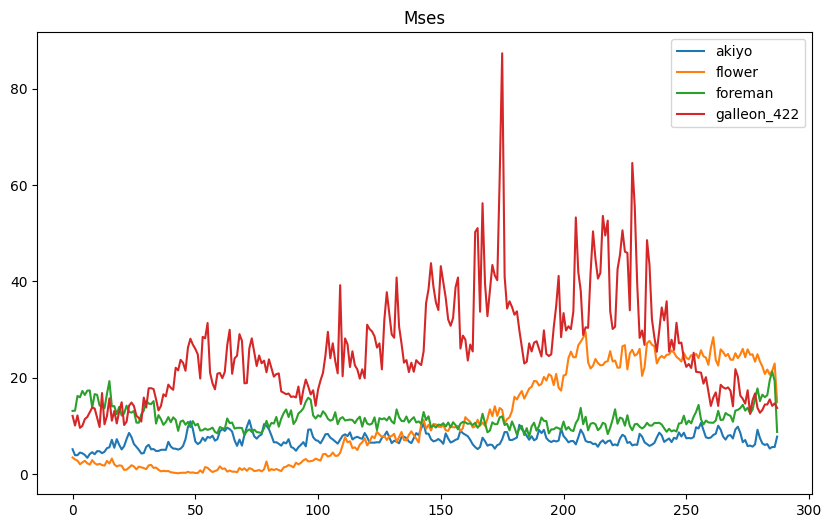

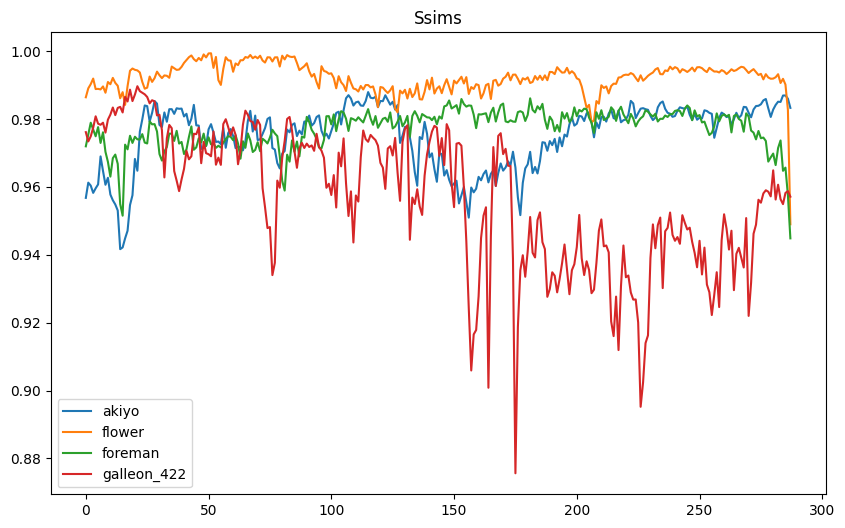

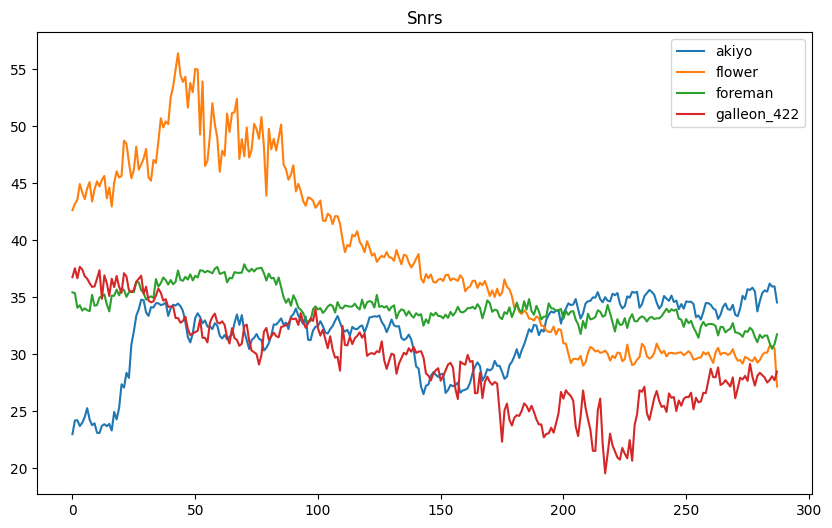

In [57]:
mses = {}
ssims = {}
snrs = {}
sizes = {}
names = ['akiyo', 'flower', 'foreman', 'galleon_422']
for name in names:
    mses[name], ssims[name], snrs[name] = runVideoEveryFrame(name +'_cif.y4m', i, './frames/' + name + '_mpeg.mpeg')


plt.figure(figsize=(10,6))
for i in range(len(names)):
    plt.plot(range(len(mses[names[i]])), mses[names[i]], label=names[i])
plt.title('Mses')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for i in range(len(names)):
    plt.plot(range(len(ssims[names[i]])), ssims[names[i]], label=names[i])
plt.title('Ssims')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for i in range(len(names)):
    plt.plot(range(len(snrs[names[i]])), snrs[names[i]], label=names[i])
plt.title('Snrs')
plt.legend()
plt.show()

### Exercici 3.2 i 3.3

Com es pot observar en les gràfiques, les diferents mesures d'error donen resultats similars però no iguals. És a dir, donen més error a les mateixes parts d'un mateix vídeo, però segueixen donant resultats mínimament diferents degut a les diferències de càlcul d'aquestes mètriques.

També es pot observar que degut a que el contingut de cada video es diferents al dels altres, les distribucions d'error que segueix cada video no sembla tenir correlació alguna amb la distribució que segueixen els altres. També, una de les raons de que un mateix video tingui més error en algunes parts que altres pot ser perque aquestes parts continguin més detalls, o més canvis de color.